# Ioannou_Georgios


## Copyright © 2022 by Georgios Ioannou


<h1 align="center"> Decision Trees (DT) and Random Forests (RF) Exercise </h1>
    

<h2 align="center"> Libraries </h2>


In [1]:
# import libraries.

# Use inline so our visualizations display in notebook.

%matplotlib inline

import graphviz                 # graphviz for visualizing our tree.
import matplotlib.pyplot as plt # matplotlib for visualization.
import numpy as np              # numpy for data wrangling.
import pandas as pd             # pandas for data wrangling.
import seaborn as sns           # seaborn for visualization.
sns.set()


from sklearn.tree import DecisionTreeClassifier      # import our Decision Tree.
from sklearn.model_selection import GridSearchCV     # helper function for hyper-parameter turning.
from sklearn.ensemble import RandomForestClassifier  # import our Random Forest.
from sklearn.model_selection import train_test_split # helper function to split our data.
from sklearn import tree                             # import the trees from sklearn.
# helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score


<h2 align="center"> Remember our main steps motto "ISBE". </h2>

<h3 align="center"> Main Steps when building a Machine Learning Model. </h3>

1. <b>I</b> - Inspect and explore data.
2. <b>S</b> - Select and engineer features.
3. <b>B</b> - Build and train model.
4. <b>E</b> - Evaluate model.


## #1 Inspect and Explore Data

1. Load titanic data.
2. Visualize all the data using sns.pairplot.
3. Check for null values.


In [2]:
# 1. Load in the titanic data set.
#    Read the file titanic.csv located inside the data folder and then load the data.

df = pd.read_csv('data/titanic.csv')

# Print/Display/Return the first 5 rows of the file titanic.csv to make sure the file was loaded successfully.

df.head()


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Figure size 504x504 with 0 Axes>

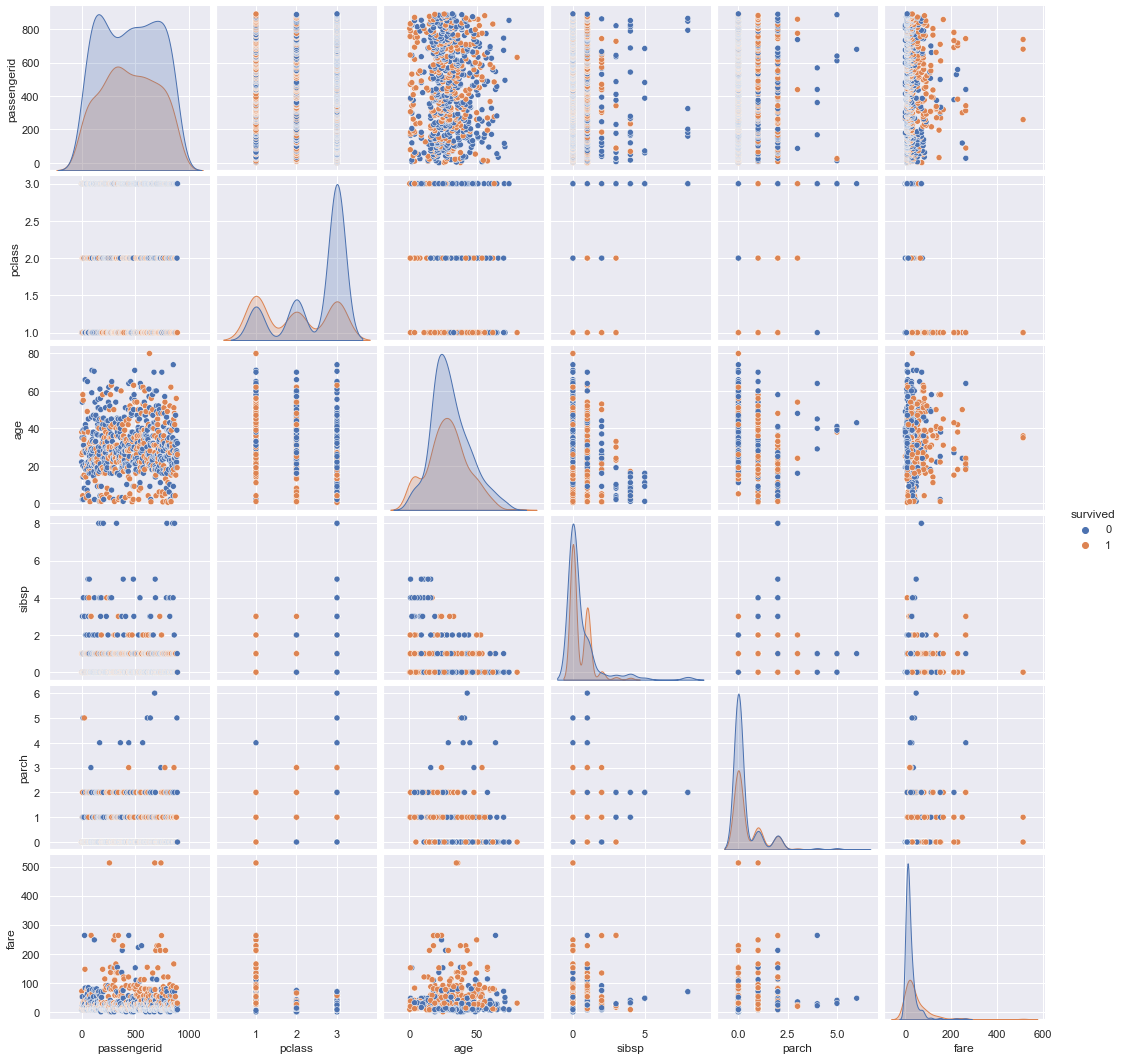

In [3]:
# 2. Visualize all the data using sns.pairplot.

plt.figure(figsize=(7, 7))
sns.pairplot(df, hue='survived');


In [4]:
# 3. Check for null values.

df.isnull().sum().sort_values(ascending=False)


cabin          687
age            177
embarked         2
passengerid      0
survived         0
pclass           0
name             0
sex              0
sibsp            0
parch            0
ticket           0
fare             0
dtype: int64

## #2 Select and Engineer Features

1. Fill age null values with -999.
2. Convert to numerical values if needed be by using `pd.get_dummies()`.
3. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
4. Define our `X` and `y`.
5. Split our data into trainig and testing sets.


In [5]:
# 1. Fill age null values with -999.

df['age'] = df['age'].fillna(-999)


In [6]:
# 2. Convert to numerical values if needed be by using `pd.get_dummies()`.

df = pd.get_dummies(df, columns=['sex', 'pclass', 'embarked'], drop_first=True)


In [7]:
# Print/Display/Return the first 5 rows of the file titanic.csv to see the data and selected features.

df.head()


,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_male,pclass_2,pclass_3,embarked_Q,embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1


In [8]:
# 3. Create a list of the features we are going to use.

selected_features = ['fare', 'age',  'sex_male', 'pclass_2', 'pclass_3',  'sibsp', 'parch', 'embarked_Q','embarked_S']


In [9]:
# 4. Define our `X` and `y`.

X = df[selected_features]

y = df['survived']


In [10]:
# 5. Split our data into trainig and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Lenght of our Training data:',  X_train.shape, '\nLength of our Testing data:', y_test.shape)


Lenght of our Training data: (712, 9) 
Length of our Testing data: (179,)


## #3 Build and Train Model

1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data.


In [11]:
# 1. For our first pass, initialize our model with `max_depth=2`.

model = DecisionTreeClassifier(max_depth=2)


In [12]:
# 2. Fit our model with our training data. 

model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2)

In [13]:
# 3. Make predictions of our testing data. 

y_pred = model.predict(X_test)


## #4 Evaluate Model

1. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
2. Visualize our Decision Tree using provided code.


In [14]:
# 1. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores.

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities.

y_pred_proba = model.predict_proba(X_test)

# Keep only the probabilities for True.

y_pred_proba = y_pred_proba[:, 1]

# Compute auc score.

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)


Accuracy Score: 0.832402
Precision Score: 0.750000
Recall Score: 0.774194
F1 Score: 0.761905
AUC Score: 0.868004


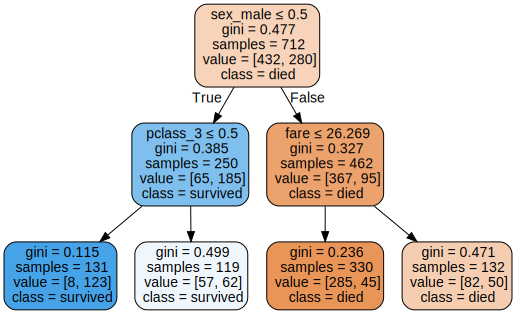

In [15]:
# 2. Visualize your decision tree.

dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=selected_features,
                     class_names=['died','survived'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph


## Picking the right parameters...

## Parameter tuning of your Decision Tree using GridSearch

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
2. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
3. Fit your GridSearchCV with your training data. 
4. Print the parameters of your best model. 
5. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
6. Visualize your best tree.
7. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [16]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 5, 7, 100], 
    'min_samples_split': [2, 10, 20, 100],
    'min_samples_leaf': [1, 10, 20, 30],
         }


In [17]:
# 2. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.
#    Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.

grid_search_cv =  GridSearchCV( 
    estimator = DecisionTreeClassifier(), 
    param_grid = params, 
    scoring = 'f1')


In [18]:
# 3. Fit your GridSearchCV with your training data. 

grid_search_cv.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 5, 7, 100],
                         'min_samples_leaf': [1, 10, 20, 30],
                         'min_samples_split': [2, 10, 20, 100]},
             scoring='f1')

In [19]:
# 4. Print the parameters of your best model. 
#    Print the best parameters it found.

print(grid_search_cv.best_params_)


{'max_depth': 100, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [20]:
# 5. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you the best Tree.

model = grid_search_cv.best_estimator_

# Now lets evaluate our model.

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1.

y_pred_proba = model.predict_proba(X_test)[:, 1]
auc =  roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)


Accuracy Score: 0.865922
Precision Score: 0.779412
Recall Score: 0.854839
F1 Score: 0.815385
AUC Score: 0.901847


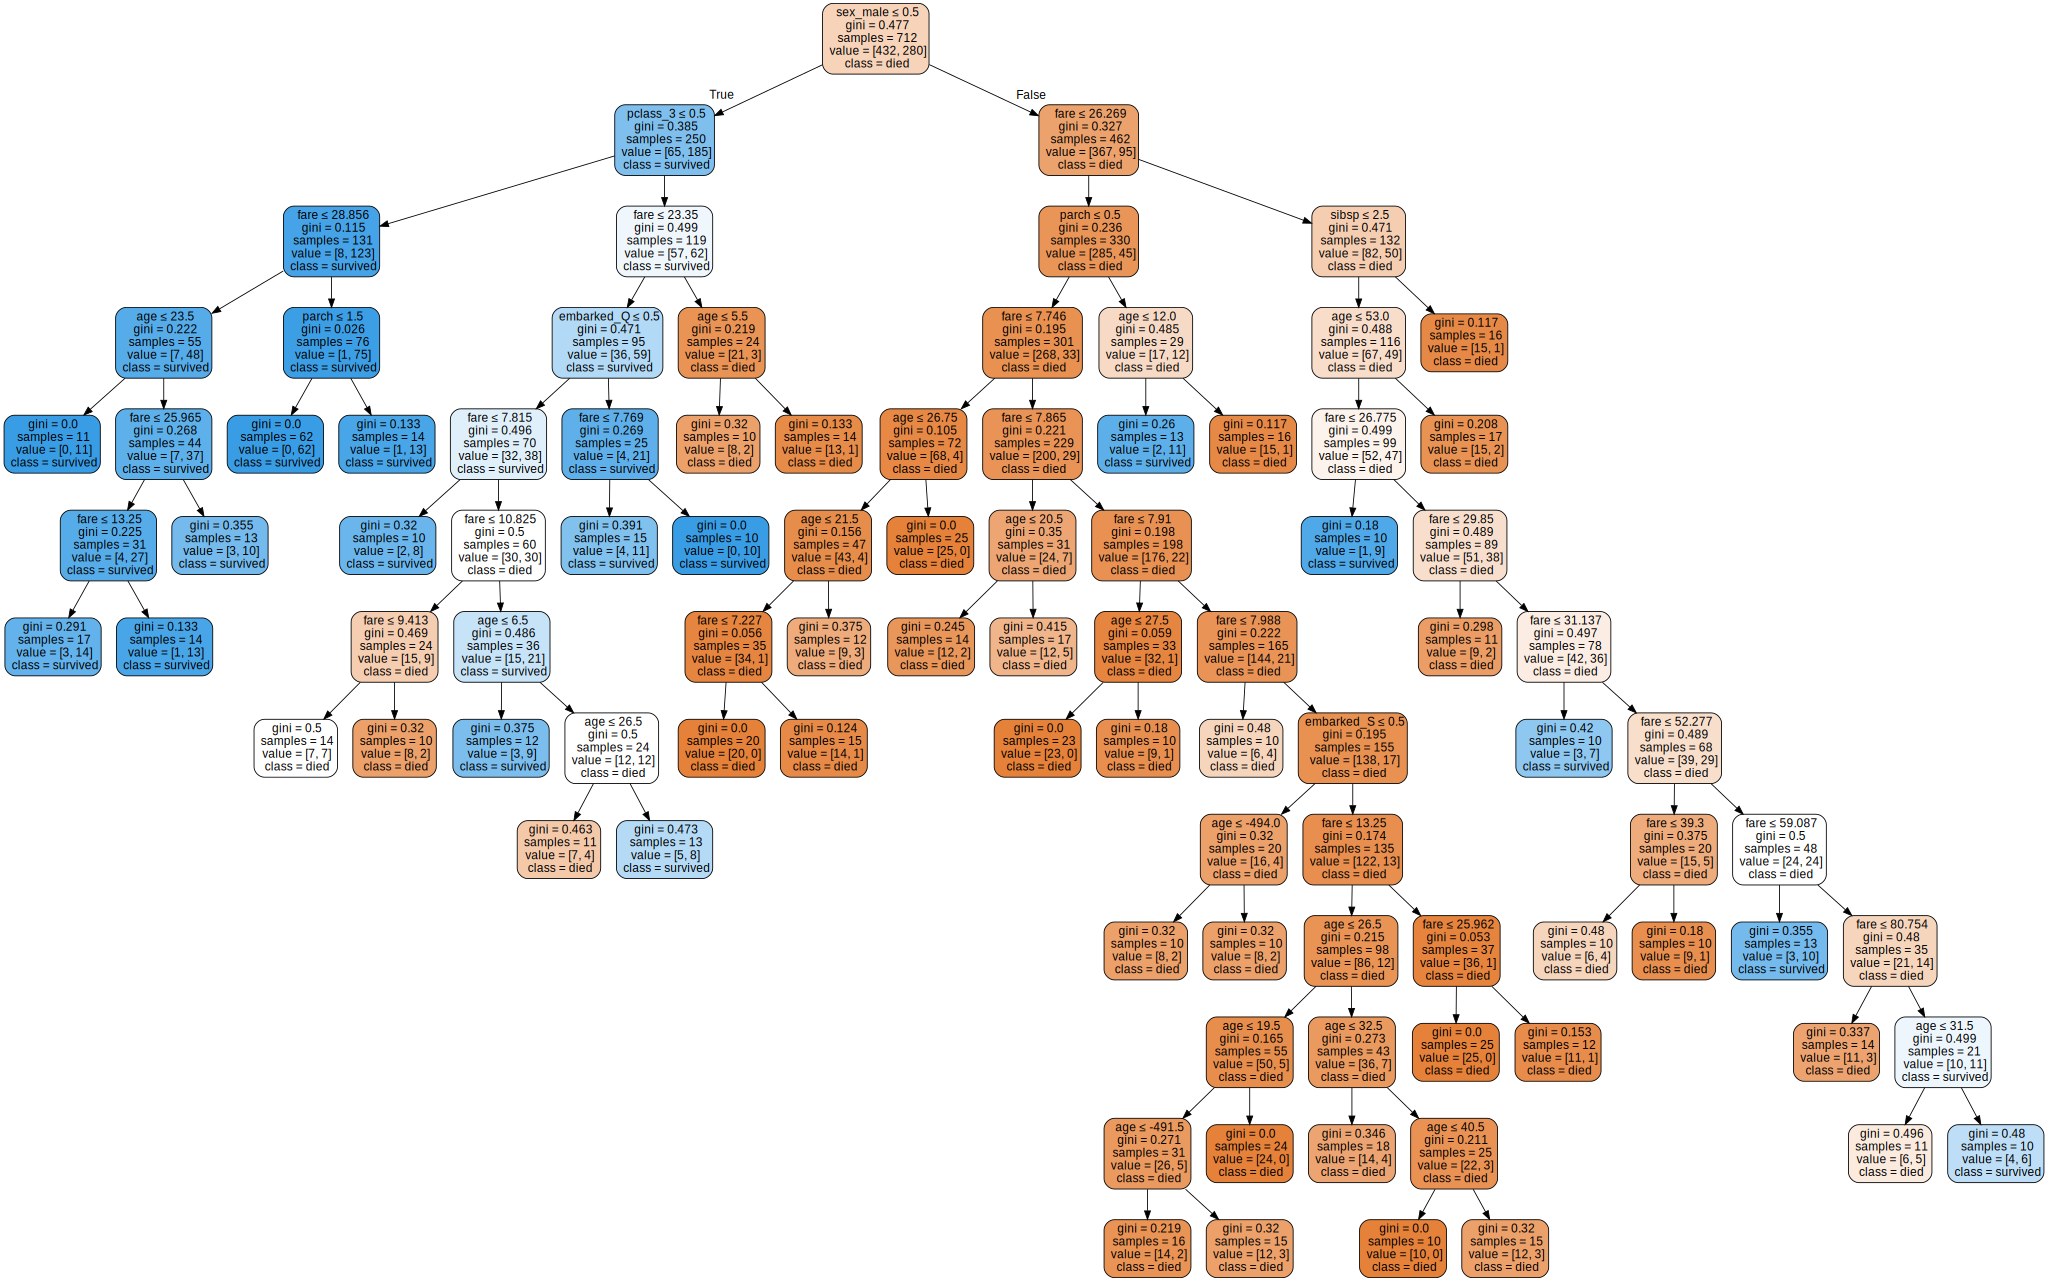

In [21]:
# 6. Visualize your best tree.

dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=selected_features,
                     class_names=['died','survived'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph


In [22]:
# 7. Which feature was your most important feature?
#    Now lets look at our feature importances.

feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features
                                      }).sort_values('feature_importance', ascending=False)
feature_imp


,feature_importance,feature
2,0.489392,sex_male
0,0.233117,fare
4,0.115064,pclass_3
1,0.097553,age
6,0.026469,parch
5,0.019243,sibsp
7,0.017184,embarked_Q
8,0.001979,embarked_S
3,0.000000,pclass_2


***
<h1 align="center"> <span style="color:#FFA500"> Which feature was your most important feature? </span> </h1>

***
<h2 align="center"> <span style="color:#964B00"> <i> sex_male </i> was my most important feature and this can be seen from the table above as it has the highest feature_importance value with the value of <i> 0.489392 </i>. </span> </h2>

***


## Now onto Random Forests...
### We are going to do the same, but this time with a Random Forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
2. Initialize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
3. Fit your GridSearchCV with your training data. 
4. Print the parameters of your best model. 
5. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
6. Which feature was your most important feature?


## Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [23]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 

params = {
    'n_estimators' : [5, 10, 50, 100],
    'max_depth': [5, 10, 100], 
    'min_samples_split': [2, 10, 100],
    'max_features': [2, 4, 'auto']
}


In [24]:
# 2. Initialize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.
#    Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.

grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='f1', )


In [25]:
# 3. Fit your GridSearchCV with your training data.

grid_search_cv.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 100],
                         'max_features': [2, 4, 'auto'],
                         'min_samples_split': [2, 10, 100],
                         'n_estimators': [5, 10, 50, 100]},
             scoring='f1')

In [26]:
# 4. Print the parameters of your best model. 
#    Print the best parameters it found.

print(grid_search_cv.best_params_)


{'max_depth': 100, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 10}


In [27]:
# 5. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score.

model = grid_search_cv.best_estimator_

# Now lets evaluate our model.

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1.

y_pred_proba = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)


Accuracy Score: 0.843575
Precision Score: 0.757576
Recall Score: 0.806452
F1 Score: 0.781250
AUC Score: 0.926868


In [28]:
# 6. Which feature was your most important feature?
#    Now lets look at our feature importances.

feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp


sex_male      0.354856
fare          0.244496
age           0.166244
pclass_3      0.071050
sibsp         0.052046
parch         0.044193
pclass_2      0.027316
embarked_Q    0.020927
embarked_S    0.018871
dtype: float64

In [29]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features
                                      }).sort_values('feature_importance', ascending=False)
feature_imp


,feature_importance,feature
2,0.354856,sex_male
0,0.244496,fare
1,0.166244,age
4,0.071050,pclass_3
5,0.052046,sibsp
6,0.044193,parch
3,0.027316,pclass_2
7,0.020927,embarked_Q
8,0.018871,embarked_S


***
<h1 align="center"> <span style="color:#FFA500"> Which feature was your most important feature? </span> </h1>

***
<h2 align="center"> <span style="color:#964B00"> <i> sex_male </i> was my most important feature and this can be seen from the table above as it has the highest feature_importance value with the value of <i> 0.354856 </i>. </span> </h2>

***


## Build a Random Forest using the ny-vs-sf-houses.csv data.

* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above 88.8889%?
* What was your most important feature?


***
<h1 align="center"> <span style="color:#FF0000"> BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW. </span> </h1>

***


<h2 align="center"> Remember our main steps motto "ISBE". </h2>

<h3 align="center"> Main Steps when building a Machine Learning Model. </h3>
    
1. <b>I</b> - Inspect and explore data.
2. <b>S</b> - Select and engineer features.
3. <b>B</b> - Build and train model.
4. <b>E</b> - Evaluate model.


## #1 Inspect and Explore Data

1. Load ny-vs-sf-houses data.
2. Visualize all the data using sns.pairplot.
3. Check for null values.


In [30]:
# 1. Load in the ny-vs-sf-houses data set.
#    Read the file ny-vs-sf-houses.csv located inside the data folder and then load the data.

df = pd.read_csv('data/ny-vs-sf-houses.csv')

# Print/Display/Return the first 5 rows of the file ny-vs-sf-houses.csv to make sure the file was loaded successfully.

df.head()


,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


<Figure size 504x504 with 0 Axes>

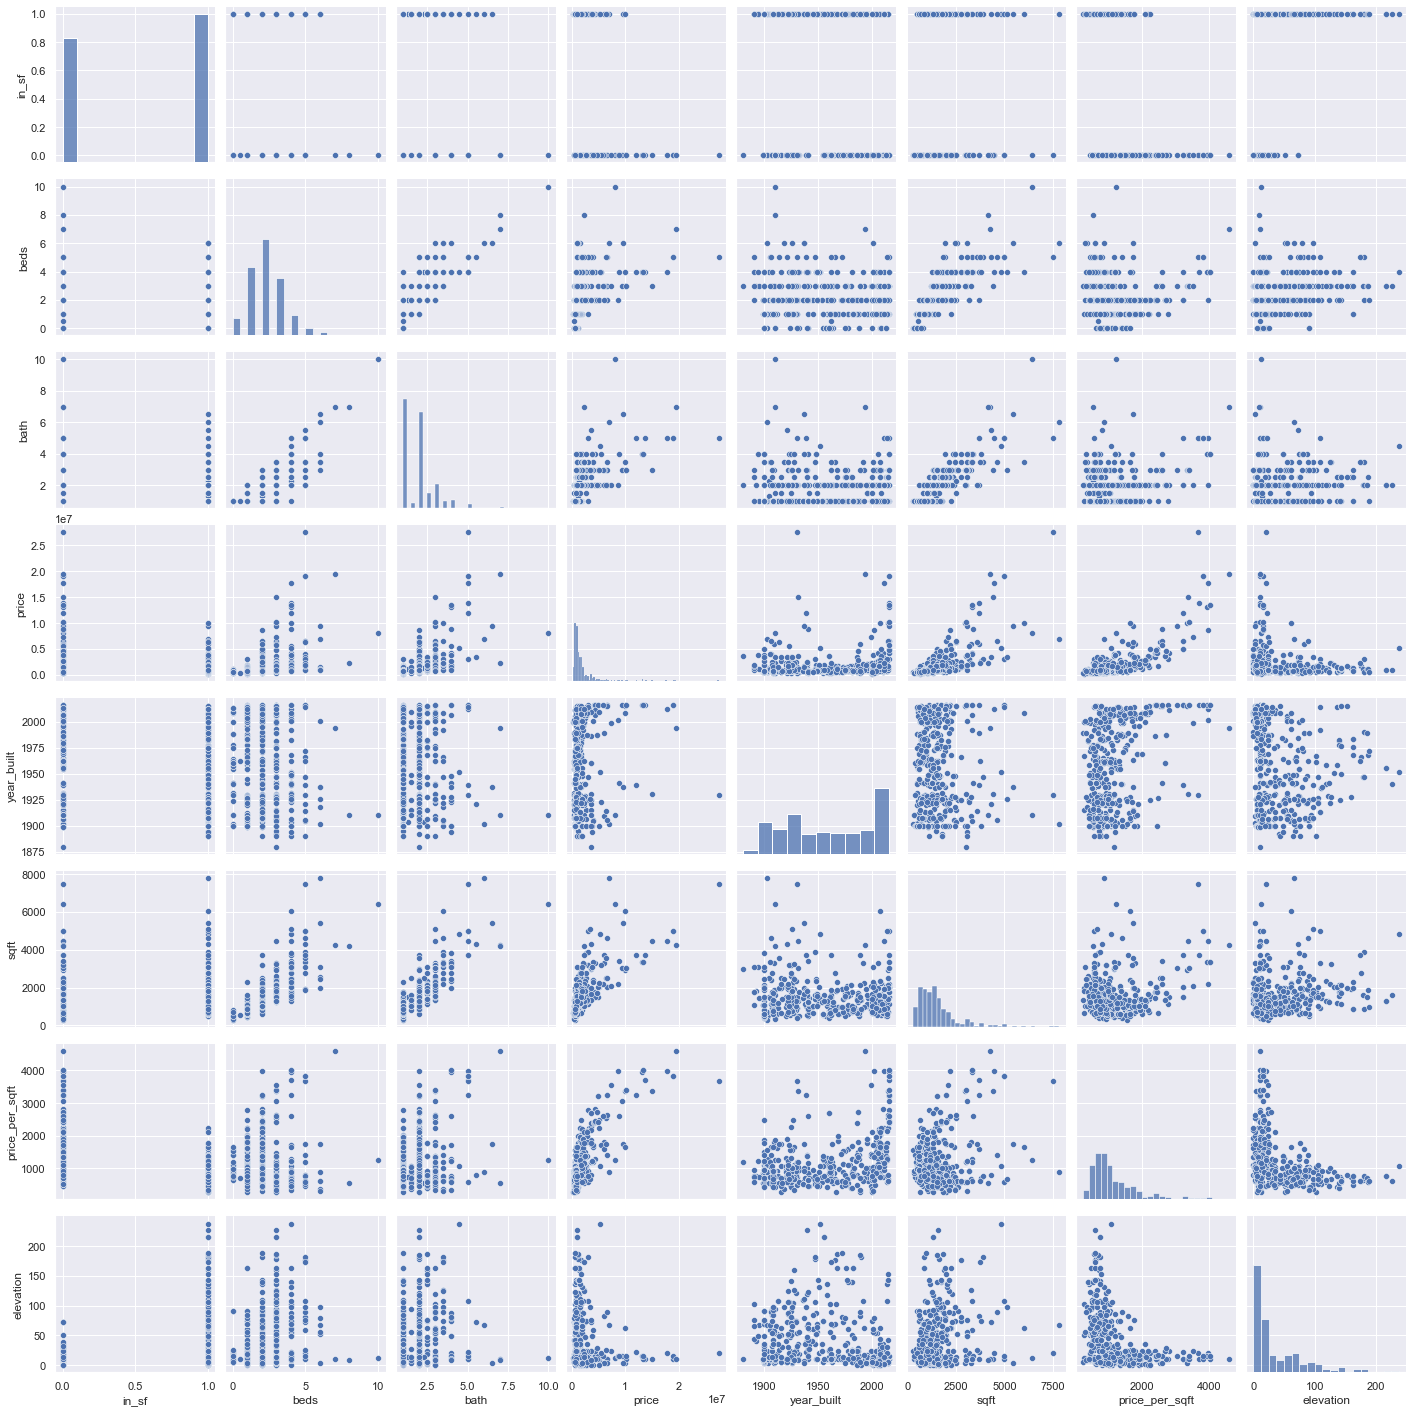

In [31]:
# 2. Visualize all the data using sns.pairplot.

plt.figure(figsize=(7, 7))
sns.pairplot(df);


<Figure size 504x504 with 0 Axes>

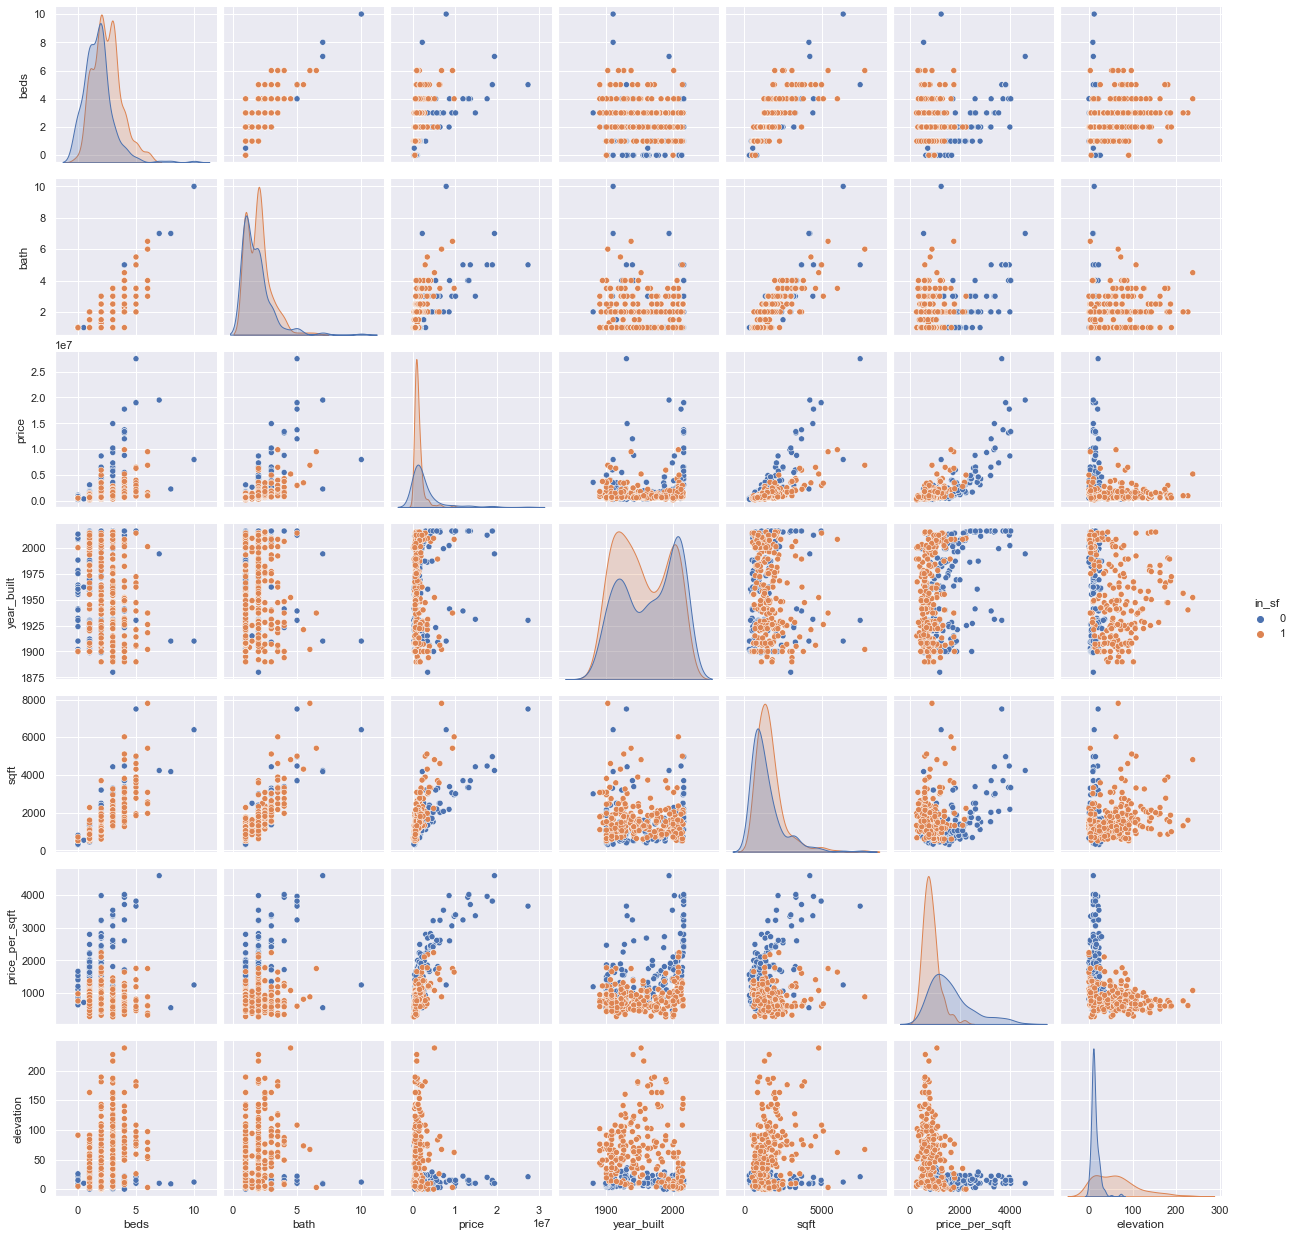

In [32]:
# Visualize all the data using sns.pairplot.

plt.figure(figsize=(7, 7))
sns.pairplot(df, hue='in_sf');


In [33]:
# 3. Check for null values.

df.isnull().sum().sort_values(ascending=False)


in_sf             0
beds              0
bath              0
price             0
year_built        0
sqft              0
price_per_sqft    0
elevation         0
dtype: int64

## #2 Select and Engineer Features

1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
2. Define our `X` and `y`.
3. Split our data into trainig and testing sets.


In [34]:
# 1. Create a list of the features you are going to use.

selected_features = ['beds', 'bath', 'price', 'year_built', 'sqft', 'price_per_sqft', 'elevation']

# 2. Define our `X` and `y`.

X = df[selected_features]
y = df['in_sf']

# 3. Split our data into trainig and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Lenght of our Training data:',  X_train.shape, '\nLength of our Testing data:', y_test.shape)


Lenght of our Training data: (393, 7) 
Length of our Testing data: (99,)


## #3 Build and Train Model

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
2. Initialize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
3. Fit your GridSearchCV with your training data. 
4. Print the parameters of your best model. 


In [35]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 

params = {
    'n_estimators' : [5, 10, 50, 100],
    'max_depth': [5, 10, 100], 
    'min_samples_split': [2, 10, 100],
    'max_features': [2, 4, 'auto']
}


In [36]:
# 2. Initialize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.
#    Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.

grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='f1', )


In [37]:
# 3. Fit your GridSearchCV with your training data.

grid_search_cv.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 100],
                         'max_features': [2, 4, 'auto'],
                         'min_samples_split': [2, 10, 100],
                         'n_estimators': [5, 10, 50, 100]},
             scoring='f1')

In [38]:
# 4. Print the parameters of your best model. 
#    Print the best parameters it found.

print(grid_search_cv.best_params_)


{'max_depth': 100, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 50}


## #4 Evaluate Model

1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
2. Which feature was your most important feature?


In [39]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score.

model = grid_search_cv.best_estimator_

# Now lets evaluate our model.

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %.2f" % (accuracy * 100),'%', sep='')

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %.2f" % (precision * 100),'%', sep='')

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %.2f" % (recall * 100),'%', sep='')

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %.2f' % (f1 * 100),'%', sep='')

# Calculate predicted probabilities, keep only probability for when class = 1.

y_pred_proba = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %.2f' % (auc * 100),'%', sep='')


Accuracy Score: 91.92%
Precision Score: 94.12%
Recall Score: 90.57%
F1 Score: 92.31%
AUC Score: 96.60%


In [40]:
# 2. Which feature was your most important feature?
#    Now lets look at our feature importances.

feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features
                                      }).sort_values('feature_importance', ascending=False)
feature_imp


,feature_importance,feature
6,0.449670,elevation
5,0.246623,price_per_sqft
3,0.118269,year_built
4,0.069541,sqft
2,0.061584,price
0,0.032017,beds
1,0.022294,bath


***
<h1 align="center"> <span style="color:#FFA500"> Which feature was your most important feature? </span> </h1>

***
<h2 align="center"> <span style="color:#964B00"> <i> elevation </i> was my most important feature and this can be seen from the table above as it has the highest feature_importance value with the value of <i> 0.449670 </i>. </span> </h2>

***


# Awesome difficult extra credit below:
Build a classifier using the adult_income.csv data.  
* The target variable is 'class'.
* Start with just using these features `selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']`
* You have to include the pos_label in your precision, recall, and f1 scores. It just tells the classifier which one is the posotive label.  I provided the proper way below.

* See if you can get above 50% f1 score.  
* See some [super tricks and tips here](https://www.kaggle.com/code/jieyima/income-classification-model)